In [2]:
import os
import random
import gzip
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_compressed_tensor(file_path):
    with gzip.open(file_path, 'rb') as f:
        data = torch.load(f, weights_only=True)
    return data['image'], data['label']

In [4]:
# Set the directory path containing the .pt.gz files
directory_path = '../BoneAI/augmented_data/valid/fold_0/'

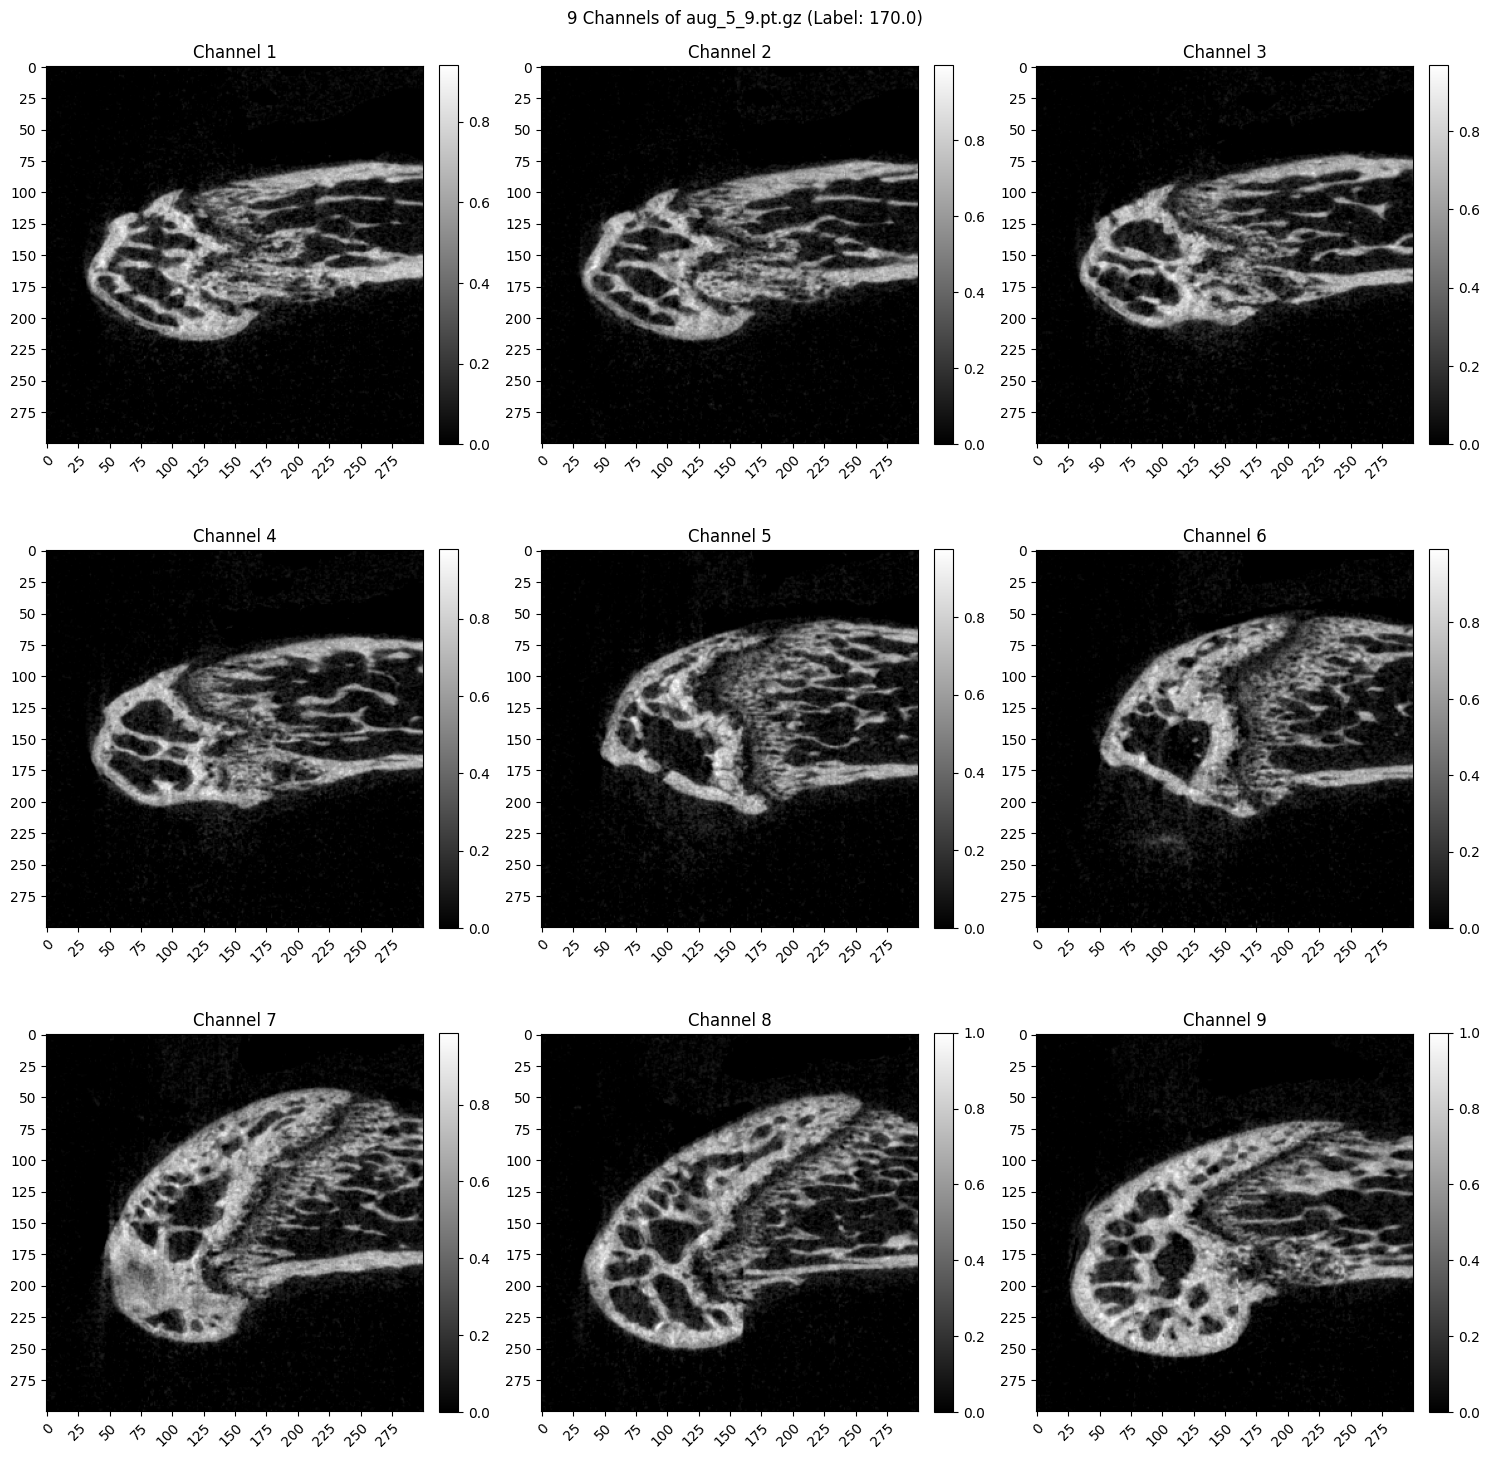

In [5]:
# Get a list of all .pt.gz files in the directory
pt_gz_files = [f for f in os.listdir(directory_path) if f.endswith('.pt.gz')]

# Randomly select one file
random_file = random.choice(pt_gz_files)
file_path = os.path.join(directory_path, random_file)

# Load the compressed tensor
image, label = load_compressed_tensor(file_path)

# Check if the tensor has 9 channels
assert image.shape[0] == 9, f"Expected 9 channels, but got {image.shape[0]}"

# Create a 3x3 grid for displaying the 9 channels
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle(f"9 Channels of {random_file} (Label: {label})")

# Iterate through the channels and display each as a grayscale image
for i in range(9):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Display the image
    im = ax.imshow(image[i].numpy(), cmap='gray')
    ax.set_title(f"Channel {i+1}")
    
    # Add pixel numbers
    ax.set_xticks(np.arange(0, image[i].shape[1], 25))
    ax.set_yticks(np.arange(0, image[i].shape[0], 25))
    ax.set_xticklabels(np.arange(0, image[i].shape[1], 25))
    ax.set_yticklabels(np.arange(0, image[i].shape[0], 25))
    
    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Add colorbar
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()